In [5]:
##import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [7]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [8]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [9]:
## Check for any duplications
df.shape

(2224, 11)

In [10]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [11]:
##Check for zero values
df.describe()


,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [13]:
## Trend chart for # of complaints at a monthly and daily 

#combine date to date_index
df["Date Index"] = df["Date_month_year"] + " " + df["Time"]
df["Date Index"]


0        22-Apr-15 3:53:50 PM
1       04-Aug-15 10:22:56 AM
2        18-Apr-15 9:55:47 AM
3       05-Jul-15 11:59:35 AM
4        26-May-15 1:25:26 PM
                ...          
2219     04-Feb-15 9:13:18 AM
2220     06-Feb-15 1:24:39 PM
2221     06-Sep-15 5:28:41 PM
2222    23-Jun-15 11:13:30 PM
2223    24-Jun-15 10:28:33 PM
Name: Date Index, Length: 2224, dtype: object

In [14]:
##change type for dates and make date_index the index

df["Date Index"] = pd.to_datetime(df["Date Index"])
df["Date_month_year"]=pd.to_datetime(df["Date_month_year"])
df2=df.set_index(df["Date Index"])

df2.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
Date Index                     datetime64[ns]
dtype: object

In [15]:
df2.head

<bound method NDFrame.head of                     Ticket #  \
Date Index                     
2015-04-22 15:53:50   250635   
2015-08-04 10:22:56   223441   
2015-04-18 09:55:47   242732   
2015-07-05 11:59:35   277946   
2015-05-26 13:25:26   307175   
...                      ...   
2015-02-04 09:13:18   213550   
2015-02-06 13:24:39   318775   
2015-09-06 17:28:41   331188   
2015-06-23 23:13:30   360489   
2015-06-24 22:28:33   363614   

                                                    Customer Complaint  \
Date Index                                                               
2015-04-22 15:53:50                      Comcast Cable Internet Speeds   
2015-08-04 10:22:56       Payment disappear - service got disconnected   
2015-04-18 09:55:47                                  Speed and Service   
2015-07-05 11:59:35  Comcast Imposed a New Usage Cap of 300GB that ...   
2015-05-26 13:25:26         Comcast not working and no service to boot   
...                                

In [16]:
#Get total number of complaints monthly and daily
#Daily
df2["Date_month_year"].value_counts()[:10]

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
2015-06-29     51
2015-06-18     47
2015-12-06     43
2015-06-27     39
2015-06-15     34
Name: Date_month_year, dtype: int64

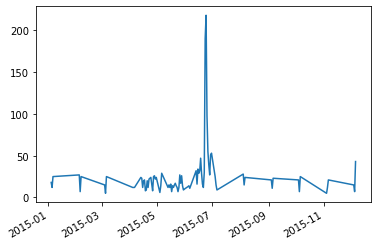

In [17]:
df2["Date_month_year"].value_counts().plot();

In [18]:
## Monthly Plot
df3 = df2.groupby(pd.Grouper(freq="M")).size()
df3.head()

Date Index
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

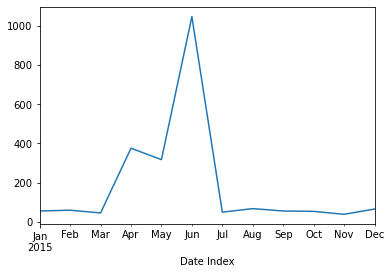

In [19]:
df3 = df2.groupby(pd.Grouper(freq="M")).size().plot();

In [24]:
#frequency of ways complaint is received
pd.crosstab(index=df2['Received Via'], columns='frequency')

col_0,frequency
Received Via,
Customer Care Call,1119
Internet,1105


In [27]:
pd.crosstab(index=df2['Customer Complaint'], columns='frequency')

col_0,frequency
Customer Complaint,
(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!,1
10 Days No Service - 12 Appointments Comcast Hasn't Shown Up - Comcast Has Not Fixed Home Infinity X1 - In 10 Days- Cannot Make 911 Calls,1
2 months and Comcast has not fixed problem,1
2+ Day Degraded Services,1
300 GB monthly allowance,1
...,...
why am I paying for this ?,1
without service despite willingness to pay,1
xfinitty tv and exfinity alarm,1


In [35]:
#Frequency of Complaint Types
df2.groupby(["Customer Complaint"]).size().sort_values(ascending=False)

Customer Complaint
Comcast                                                  83
Comcast Internet                                         18
Comcast Data Cap                                         17
comcast                                                  13
Comcast Billing                                          11
                                                         ..
Comcast internet speeds extremely slow                    1
Comcast internet speeds                                   1
Comcast internet service that I was NEVER able to use     1
Comcast internet price high                               1
xfinity customer service                                  1
Length: 1841, dtype: int64

In [36]:
#List of different statuses
df2.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [37]:
#frequency of statuses of complaints
df2.Status.value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [38]:
## Bucket Statuses --- open = open and pending, close = solved

df2["Bucket_Status"] = ["Open" if Status == "Open" or Status == "Pending" else "Closed" for Status in df["Status"]]
df2.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date Index,Bucket_Status
Date Index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed


In [39]:
df2.Bucket_Status.value_counts()

Closed    1707
Open       517
Name: Bucket_Status, dtype: int64

In [51]:
## State wise status of complaint 
df2.groupby(["State"]).size().sort_values(ascending=False).reset_index().rename({0:"Count"},axis=1)[:5]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [63]:
df4=df2.groupby(["State","Bucket_Status"]).size().sort_values(ascending=False).unstack().fillna(0)
df4.head()

Bucket_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


<AxesSubplot:ylabel='State'>

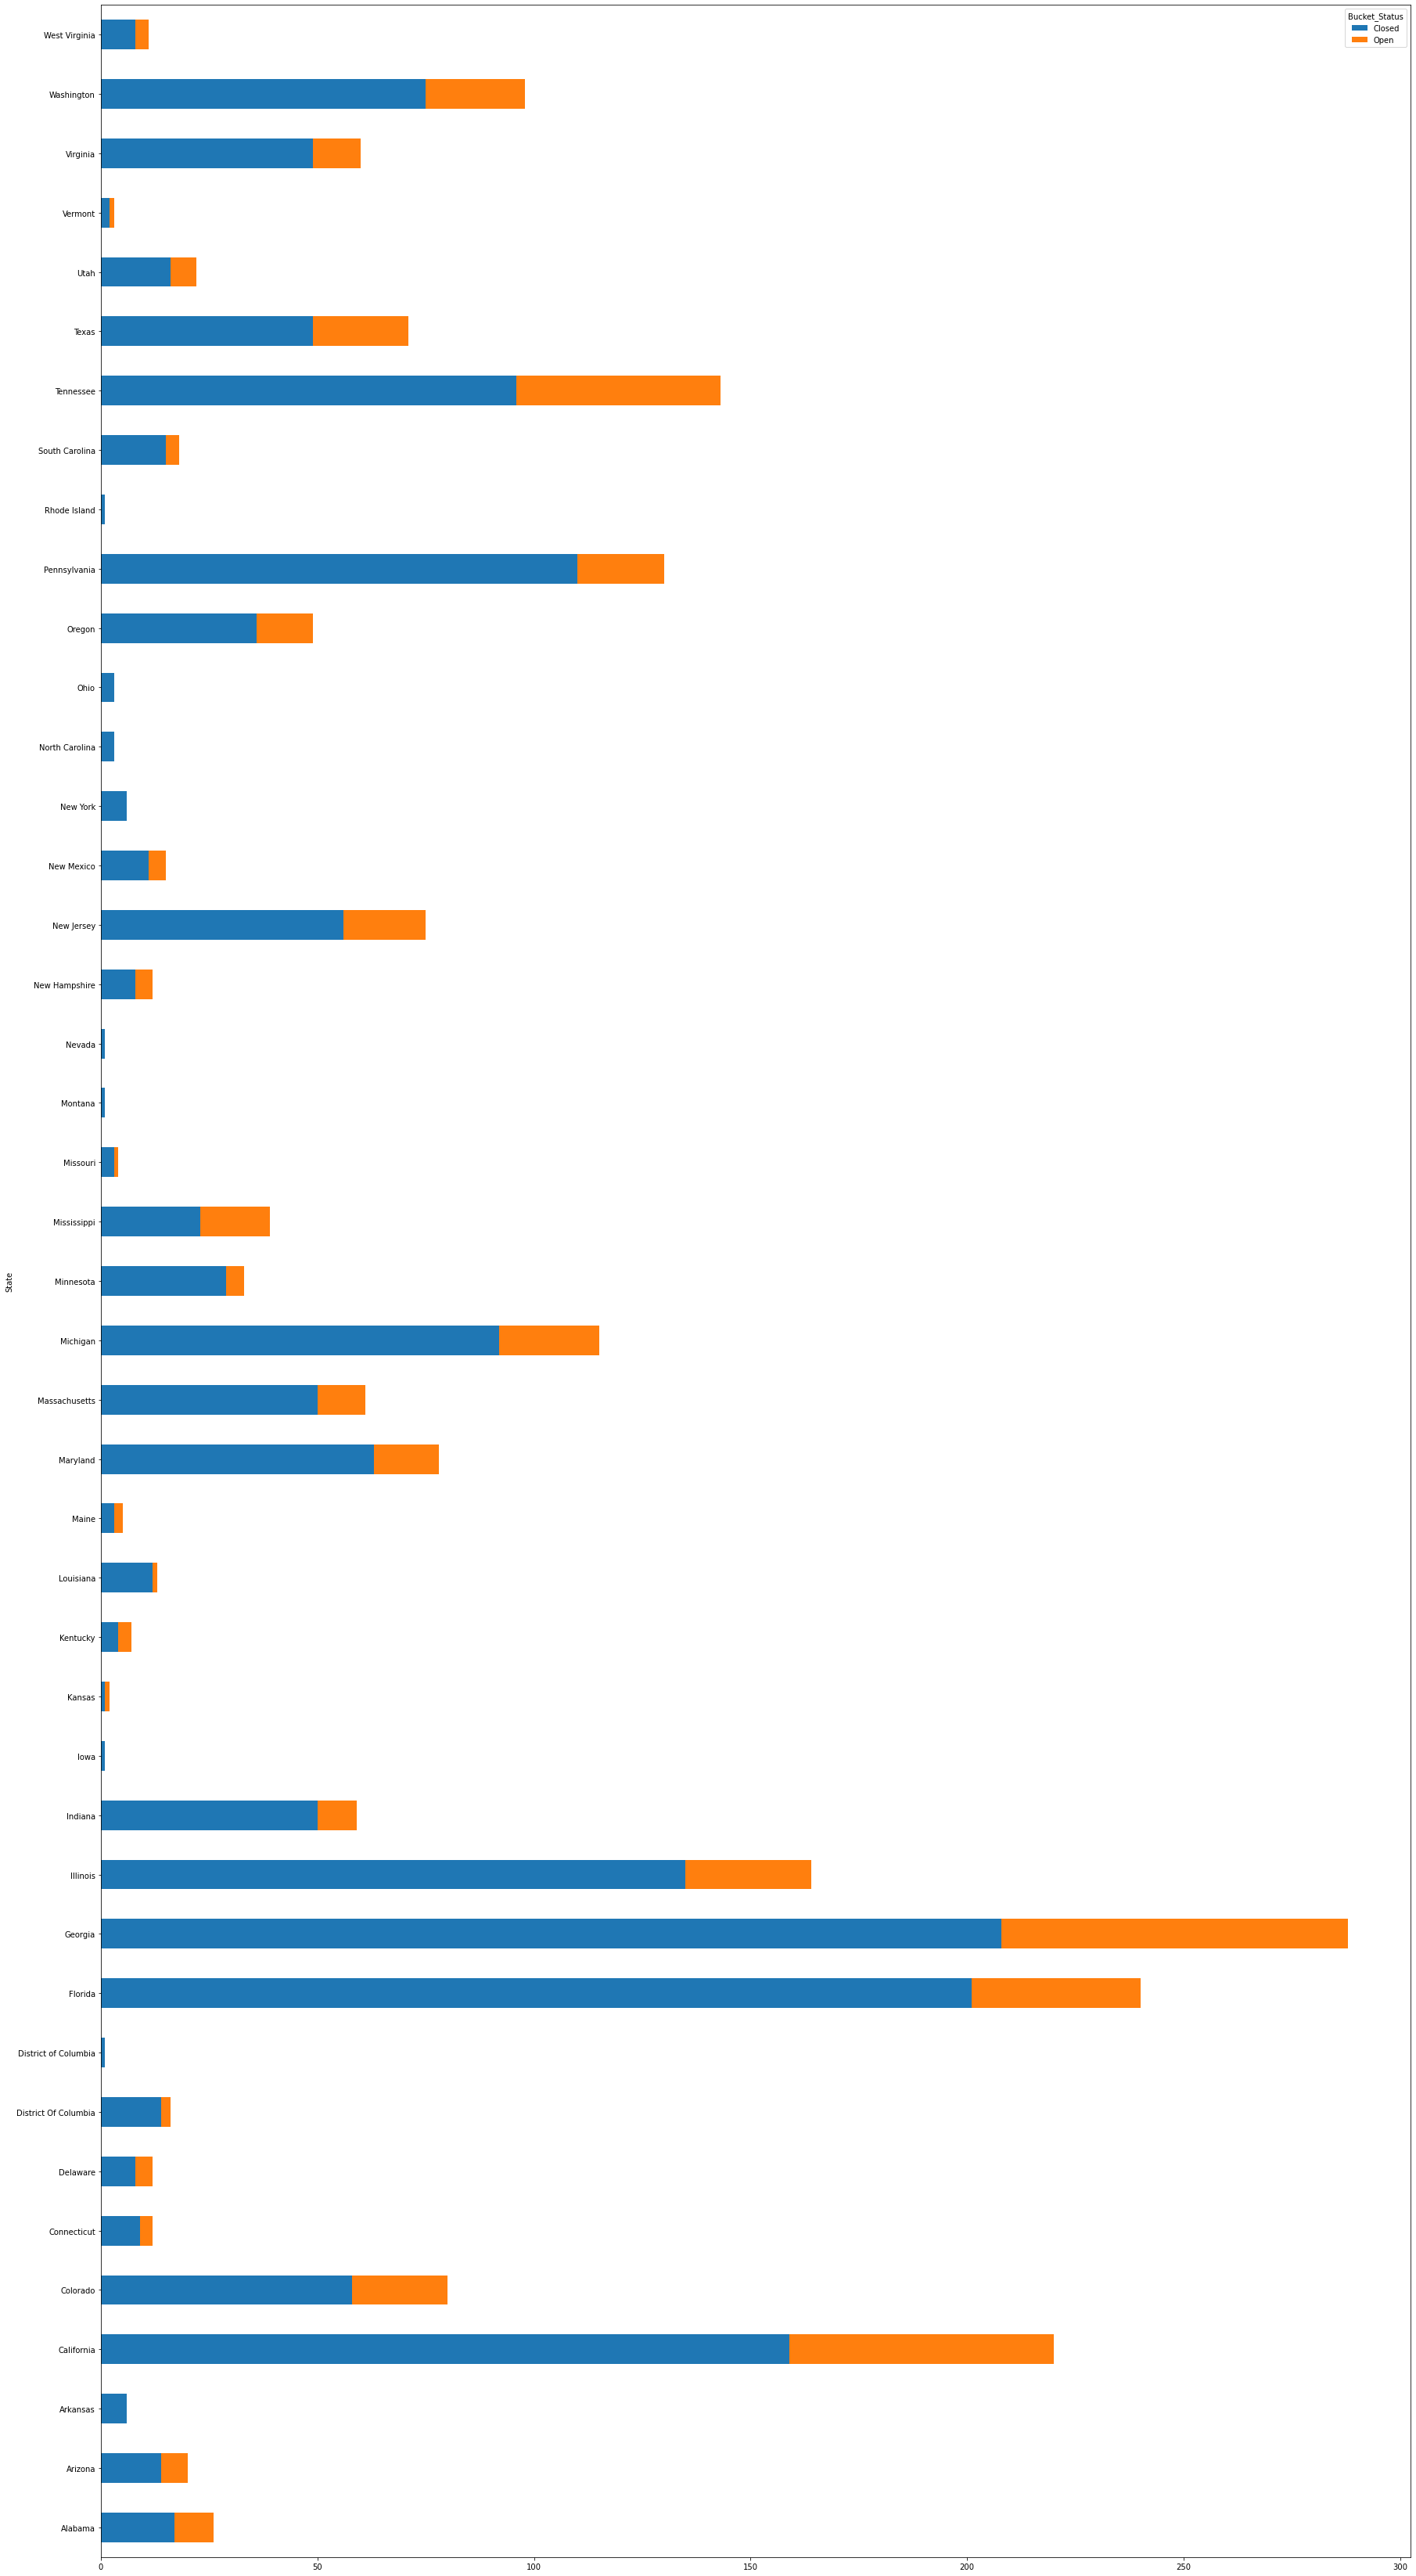

In [64]:
df4.plot(kind="barh",figsize=(30,60),stacked=True)

In [68]:
df2.groupby(["State"]).size().sort_values(ascending=False).reset_index().rename({0:"Count"},axis=1).max()

State    West Virginia
Count              288
dtype: object

In [70]:
df2.groupby(["State","Bucket_Status"]).size().unstack().fillna(0).max()

Bucket_Status
Closed    208.0
Open       80.0
dtype: float64

In [ ]:
#find percentage of unresolved complaints
df2["Percentage_Unresolved"]= 

## 